## Ashim Sedhain
## MSCS-634-B01: Advanced Big Data and Data Mining
## Lab 6: Association Rule Mining with Apriori and FP-Growth

#### I am using Instacart Dataset for this lab. I found this dataset through Kaggle. This dataset has 6 csv files, but for this lab I am using only 'order_products__prior.csv' and 'products.csv'. First file has product IDs per order, and second file has the names of products.

In [1]:
import pandas as pd
import numpy as np

# Loading the files
order_products = pd.read_csv("./sample_data/order_products__prior.csv")
products = pd.read_csv("./sample_data/products.csv")

### Now, I merged the two files

In [2]:
df = order_products.merge(products, on="product_id", how="left")
df = df[["order_id", "product_name"]]

df.head()

,order_id,product_name
0,2,Organic Egg Whites
1,2,Michigan Organic Kale
2,2,Garlic Powder
3,2,Coconut Butter
4,2,Natural Sweetener


#### Applying data cleaning: dropping missing names and removing duplicates

In [3]:
df.dropna(subset=["product_name"], inplace=True)

df.drop_duplicates(subset=["order_id", "product_name"], inplace=True)

df.isna().sum()

,0
order_id,0
product_name,0


#### Now, I created transactions. It is list of items per order

In [4]:
transactions = df.groupby("order_id")["product_name"].apply(list).values.tolist()
transactions[:3]

[['Organic Egg Whites',
  'Michigan Organic Kale',
  'Garlic Powder',
  'Coconut Butter',
  'Natural Sweetener',
  'Carrots',
  'Original Unflavored Gelatine Mix',
  'All Natural No Stir Creamy Almond Butter',
  'Classic Blend Cole Slaw'],
 ['Total 2% with Strawberry Lowfat Greek Strained Yogurt',
  'Unsweetened Almondmilk',
  'Lemons',
  'Organic Baby Spinach',
  'Unsweetened Chocolate Almond Breeze Almond Milk',
  'Organic Ginger Root',
  'Air Chilled Organic Boneless Skinless Chicken Breasts',
  'Organic Ezekiel 49 Bread Cinnamon Raisin'],
 ['Plain Pre-Sliced Bagels',
  'Honey/Lemon Cough Drops',
  'Chewy 25% Low Sugar Chocolate Chip Granola',
  'Oats & Chocolate Chewy Bars',
  "Kellogg's Nutri-Grain Apple Cinnamon Cereal",
  'Nutri-Grain Soft Baked Strawberry Cereal Breakfast Bars',
  "Kellogg's Nutri-Grain Blueberry Cereal",
  'Tiny Twists Pretzels',
  'Traditional Snack Mix',
  'Goldfish Cheddar Baked Snack Crackers',
  'Original Orange Juice',
  'Sugarfree Energy Drink',
  'Ener

#### Now, I am visualizing the Top 20 Most Frequent Items

#### Bar-chart

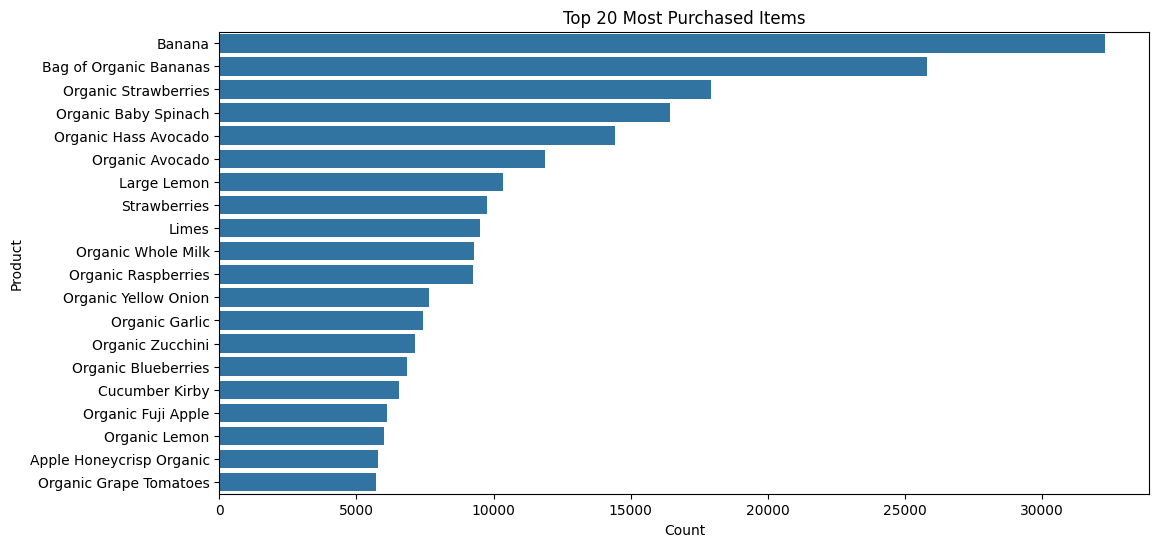

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

top_items = df["product_name"].value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=top_items.values, y=top_items.index)
plt.title("Top 20 Most Purchased Items")
plt.xlabel("Count")
plt.ylabel("Product")
plt.show()

#### Heatmap

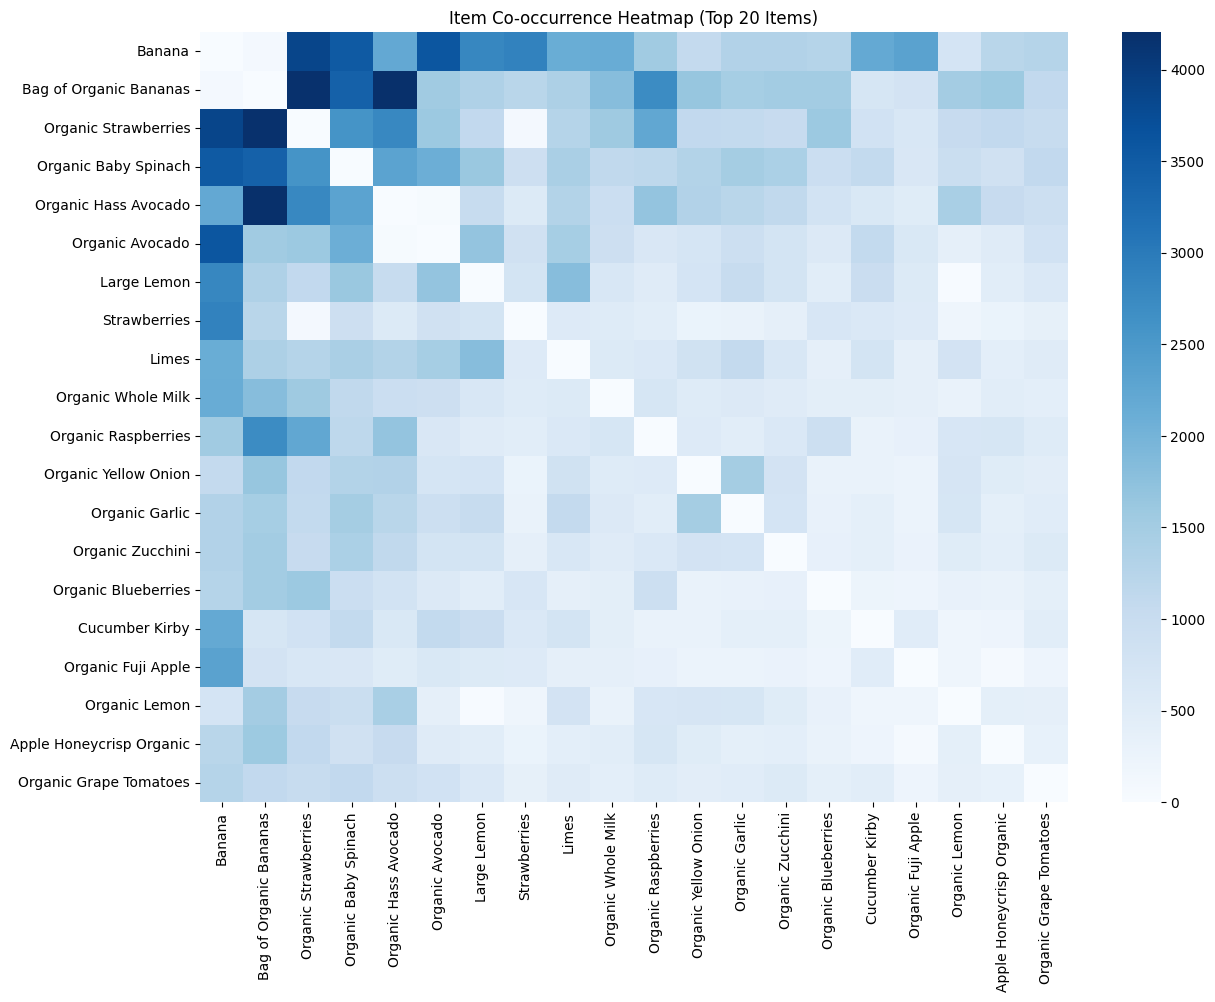

In [6]:
top20 = top_items.index.tolist()


co_matrix = pd.DataFrame(0, index=top20, columns=top20)

for basket in transactions:
    basket = set(basket)
    basket = [item for item in basket if item in top20]
    for i in basket:
        for j in basket:
            if i != j:
                co_matrix.loc[i, j] += 1

plt.figure(figsize=(14,10))
sns.heatmap(co_matrix, cmap="Blues")
plt.title("Item Co-occurrence Heatmap (Top 20 Items)")
plt.show()

#### Now, let's perform Frequent Itemset Mining - Apriori

In [8]:
%pip install mlxtend --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.6 MB/s eta 0:00:00


In [9]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

df_encoded = pd.DataFrame(te_array, columns=te.columns_)
df_encoded.head()

,#2 Coffee Filters,#2 Cone White Coffee Filters,#4 Natural Brown Coffee Filters,& Go! Hazelnut Spread + Pretzel Sticks,+Energy Black Cherry Vegetable & Fruit Juice,".5\"" Waterproof Tape",0 Calorie Acai Raspberry Water Beverage,0 Calorie Fuji Apple Pear Water Beverage,0 Calorie Strawberry Dragonfruit Water Beverage,0% Fat Black Cherry Greek Yogurt y,...,with Sweet Cinnamon Bunches Cereal,with Twist Ties Sandwich & Storage Bags,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Island Berry Lime 18 Sticks Sugar Free Gum,with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,with a Splash of Mango Coconut Water,with a Splash of Pineapple Coconut Water
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Now, let's apply Apriori

In [10]:
from mlxtend.frequent_patterns import apriori
import time

min_support = 0.01

start = time.time()
apriori_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
apriori_time = time.time() - start

apriori_itemsets.sort_values("support", ascending=False).head()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,support,itemsets
6,0.147943,(Banana)
5,0.118238,(Bag of Organic Bananas)
73,0.082103,(Organic Strawberries)
35,0.075192,(Organic Baby Spinach)
55,0.066083,(Organic Hass Avocado)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


#### Now, let's visualize the Top 10 Apriori Itemsets

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

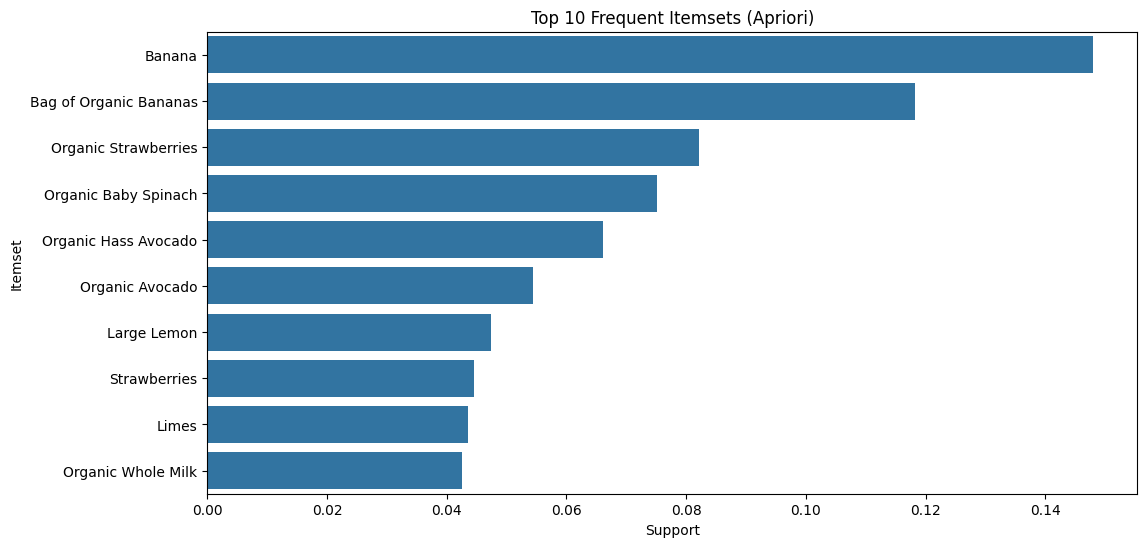

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [11]:
topN = apriori_itemsets.sort_values("support", ascending=False).head(10)
topN["itemset_str"] = topN["itemsets"].apply(lambda x: ", ".join(list(x)))

plt.figure(figsize=(12,6))
sns.barplot(x=topN["support"], y=topN["itemset_str"])
plt.title("Top 10 Frequent Itemsets (Apriori)")
plt.xlabel("Support")
plt.ylabel("Itemset")
plt.show()

#### Now, let's perform Frequent Itemset Mining - FP-Growth

In [12]:
from mlxtend.frequent_patterns import fpgrowth

sampled_orders_fp = df["order_id"].drop_duplicates().sample(3000, random_state=42)
df_fp = df[df["order_id"].isin(sampled_orders_fp)]

TOP_K_ITEMS_FP = 200
top_products_fp = df_fp["product_name"].value_counts().head(TOP_K_ITEMS_FP).index
df_fp = df_fp[df_fp["product_name"].isin(top_products_fp)]

transactions_fp = df_fp.groupby("order_id")["product_name"].apply(list).tolist()

te_fp = TransactionEncoder()
df_encoded_fp = pd.DataFrame(te_fp.fit(transactions_fp).transform(transactions_fp))

min_support = 0.01
start = time.time()
fpg_itemsets = fpgrowth(df_encoded_fp, min_support=min_support, use_colnames=True)
fpg_time = time.time() - start

print(f"FP-Growth completed in {fpg_time:.2f} seconds")
fpg_itemsets.sort_values("support", ascending=False).head()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

FP-Growth completed in 0.24 seconds


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,support,itemsets
25,0.180984,(9)
1,0.147206,(8)
15,0.104671,(137)
19,0.094662,(67)
21,0.079650,(105)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


#### Now, let's visualize the Top 10 FP-Growth Itemsets

In [13]:
topN_fp = fpg_itemsets.sort_values("support", ascending=False).head(10)
topN_fp["itemset_str"] = topN_fp["itemsets"].apply(lambda x: ", ".join(list(x)))

plt.figure(figsize=(12,6))
sns.barplot(x=topN_fp["support"], y=topN_fp["itemset_str"])
plt.title("Top 10 Frequent Itemsets (FP-Growth)")
plt.xlabel("Support")
plt.ylabel("Itemset")
plt.show()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

TypeError: sequence item 0: expected str instance, int found

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### Now, let's generate Association Rules

In [14]:
from mlxtend.frequent_patterns import association_rules

# Apriori rules
rules_apriori = association_rules(apriori_itemsets, metric="confidence", min_threshold=0.3)
rules_apriori.sort_values("lift", ascending=False).head()

# FP-Growth rules
rules_fp = association_rules(fpg_itemsets, metric="confidence", min_threshold=0.3)
rules_fp.sort_values("lift", ascending=False).head()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
5,(199),(9),0.028774,0.180984,0.011676,0.405797,2.242169,1.0,0.006469,1.378344,0.570416,0.058947,0.274492,0.235157
7,(112),(8),0.034195,0.147206,0.010842,0.317073,2.153942,1.0,0.005809,1.248734,0.554703,0.063570,0.199189,0.195364
2,(5),(8),0.039199,0.147206,0.012093,0.308511,2.095775,1.0,0.006323,1.233271,0.544181,0.069378,0.189148,0.195332
1,(115),(8),0.035863,0.147206,0.010842,0.302326,2.053758,1.0,0.005563,1.222338,0.532173,0.062954,0.181896,0.187990
0,(143),(8),0.059633,0.147206,0.017932,0.300699,2.042711,1.0,0.009153,1.219495,0.542825,0.094923,0.179989,0.211256


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


#### Now, let's visualize the confidence vs the lift

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

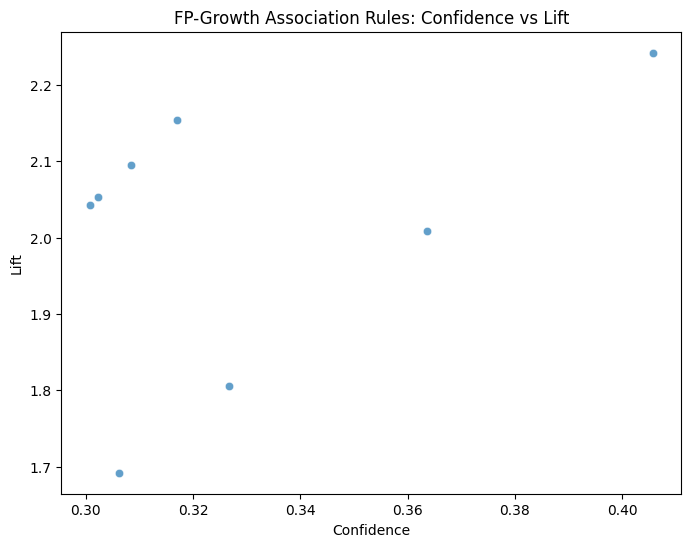

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=rules_fp, x="confidence", y="lift", alpha=0.7)
plt.title("FP-Growth Association Rules: Confidence vs Lift")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.show()

#### Now, let's do comparative analysis

In [17]:
print(f"Apriori time: {apriori_time:.2f} seconds")
print(f"FP-Growth time: {fpg_time:.2f} seconds")
print(f"Number of Apriori itemsets: {len(apriori_itemsets)}")
print(f"Number of FP-Growth itemsets: {len(fpg_itemsets)}")

Apriori time: 18.77 seconds
FP-Growth time: 0.24 seconds
Number of Apriori itemsets: 118
Number of FP-Growth itemsets: 175


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### For the chosen Instacart dataset, FP-Growth was much faster than Apriori, completing in 0.24 seconds compared to Apriori’s 18.77 seconds. The reason is that FP-Growth uses a tree-based structure (FP-tree) to efficiently compress the dataset and directly extract frequent itemsets without generating all possible candidate combinations. In contrast, Apriori repeatedly scans the dataset to generate candidate itemsets, which becomes increasingly time-consuming as the number of transactions and unique items grows. This makes FP-Growth far more efficient and scalable for large, sparse datasets like Instacart.